# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Bayu Puspito Aji]
- **Email:** [puspitoajibayu@gmail.com]
- **ID Dicoding:** [bayupa]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
    Bagaimana perbandingan kinerja antara seller-seller dari berbagai kota atau negara bagian?
- Pertanyaan 2
    Apakah ada kelompok seller tertentu yang menonjol dalam hal jumlah penjualan atau kepuasan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
order_df = pd.read_csv("Data/order_items_dataset.csv")
order_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
seller_df = pd.read_csv("Data/sellers_dataset.csv")
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [7]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
order_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", order_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
order_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [8]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [12]:
seller_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", seller_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
seller_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
merged_data = pd.merge(order_df, seller_df, on='seller_id', how='inner')
merged_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [18]:
print(merged_data.describe())


       order_item_id          price  freight_value  seller_zip_code_prefix
count  112650.000000  112650.000000  112650.000000           112650.000000
mean        1.197834     120.653739      19.990320            24439.170431
std         0.705124     183.633928      15.806405            27596.030909
min         1.000000       0.850000       0.000000             1001.000000
25%         1.000000      39.900000      13.080000             6429.000000
50%         1.000000      74.990000      16.260000            13568.000000
75%         1.000000     134.900000      21.150000            27930.000000
max        21.000000    6735.000000     409.680000            99730.000000


In [19]:
print(merged_data['seller_city'].value_counts())


seller_city
sao paulo          27983
ibitinga            7750
curitiba            3016
santo andre         2964
belo horizonte      2593
                   ...  
rio das pedras         1
abadia de goias        1
eusebio                1
condor                 1
avare                  1
Name: count, Length: 611, dtype: int64


In [20]:
print(merged_data['seller_state'].value_counts())

seller_state
SP    80342
MG     8827
PR     8671
RJ     4818
SC     4075
RS     2199
DF      899
BA      643
GO      520
PE      448
MA      405
ES      372
MT      145
CE       94
RN       56
MS       50
PB       38
RO       14
PI       12
SE       10
PA        8
AM        3
AC        1
Name: count, dtype: int64


In [21]:
top_sellers = merged_data['seller_id'].value_counts().head(10)
print("Top 10 Seller berdasarkan Jumlah Penjualan:")
print(top_sellers)

Top 10 Seller berdasarkan Jumlah Penjualan:
seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
955fee9216a65b617aa5c0531780ce60    1499
1025f0e2d44d7041d6cf58b6550e0bfa    1428
7c67e1448b00f6e969d365cea6b010ab    1364
ea8482cd71df3c1969d7b9473ff13abc    1203
7a67c85e85bb2ce8582c35f2203ad736    1171
Name: count, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1:

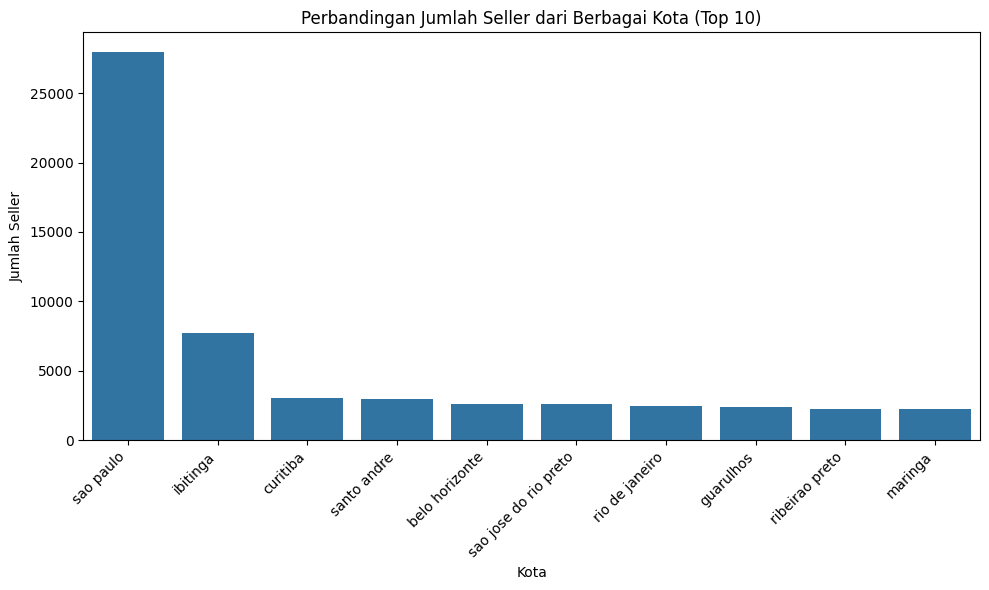

In [22]:
# Ambil 10 kota teratas berdasarkan jumlah seller
top_cities = merged_data['seller_city'].value_counts().head(10).index

# Filter data hanya untuk kota-kota teratas
filtered_data = merged_data[merged_data['seller_city'].isin(top_cities)]

# Visualisasi perbandingan kinerja seller dari berbagai kota teratas
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='seller_city', order=top_cities)
plt.title('Perbandingan Jumlah Seller dari Berbagai Kota (Top 10)')
plt.xlabel('Kota')
plt.ylabel('Jumlah Seller')
plt.xticks(rotation=45, ha='right')  # Putar label 45 derajat dan posisikan ke kanan
plt.tight_layout()  # Atur layout agar lebih rapi
plt.show()

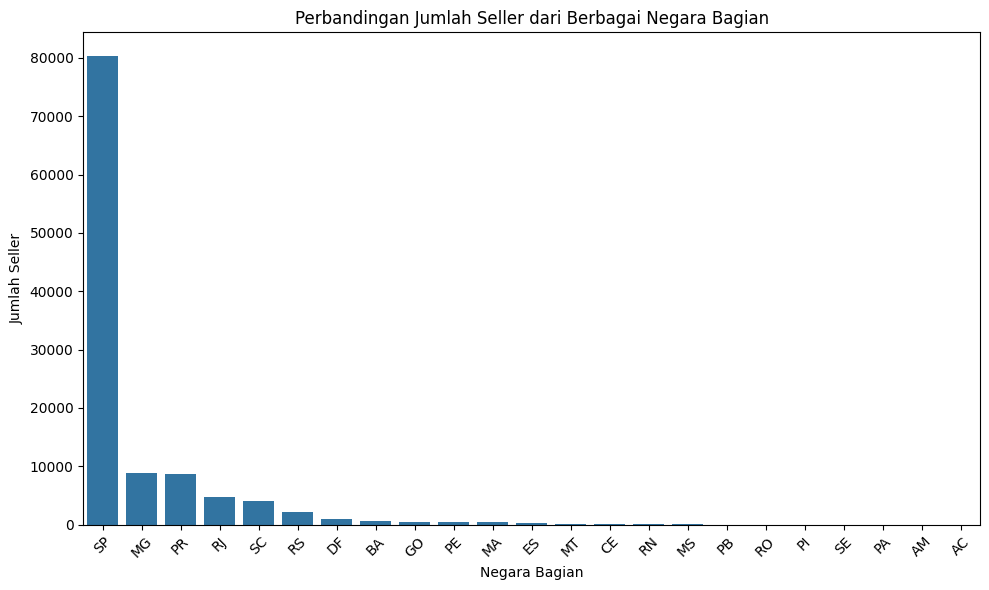

In [26]:

# Title
plt.figure(figsize=(10, 6))
plt.title('Perbandingan Jumlah Seller dari Berbagai Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Seller')

# Visualisasi perbandingan jumlah seller dari berbagai negara bagian
sns.countplot(data=merged_data, x='seller_state', order=merged_data['seller_state'].value_counts().index)
plt.xticks(rotation=45)  # Putar label negara bagian agar lebih mudah dibaca
plt.tight_layout()

# Tampilkan visualisasi
plt.show()

### Pertanyaan 2:

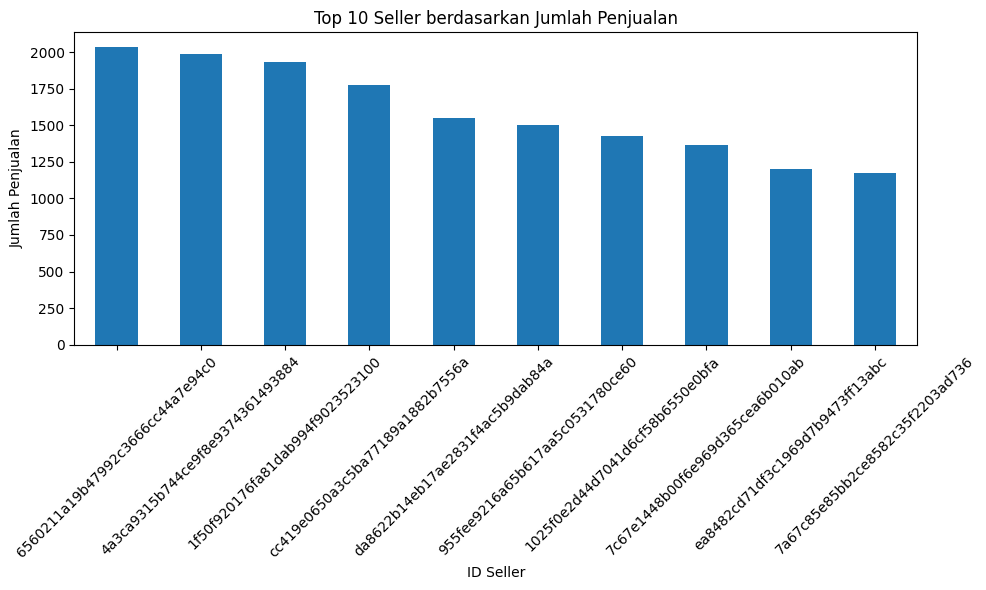

In [23]:
top_sellers = merged_data['seller_id'].value_counts().head(10)

# Visualisasi top 10 seller berdasarkan jumlah penjualan
plt.figure(figsize=(10, 6))
top_sellers.plot(kind='bar')
plt.title('Top 10 Seller berdasarkan Jumlah Penjualan')
plt.xlabel('ID Seller')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1
    Dari visualisasi jumlah seller dari berbagai kota atau negara bagian, terlihat bahwa ada variasi dalam distribusi seller dari lokasi geografis yang berbeda. Beberapa kota atau negara bagian mungkin memiliki jumlah seller yang lebih banyak daripada yang lain, menunjukkan potensi pasar yang lebih besar di kota-kota tersebut.
- Conclution pertanyaan 2
    Dari analisis jumlah penjualan seller, dapat dilihat bahwa ada beberapa seller yang menonjol dengan jumlah penjualan yang tinggi, sementara yang lain mungkin memiliki performa penjualan yang lebih rendah. Identifikasi seller-seller yang menonjol dalam hal jumlah penjualan dapat memberikan wawasan berharga tentang faktor-faktor yang menyebabkan keberhasilan penjualan, seperti kualitas produk, harga kompetitif, atau pelayanan pelanggan yang baik.

In [27]:
merged_data.to_csv('merged_data.csv', index=False)